M2780.002400 Machine Listening (Fall 2020)

Instructor: Kyogu Lee (kglee@snu.ac.kr)

# Assignment 4: Speech Analysis

(90 points)

Due Date : This assignment is due by 12:59PM, October 6 (Tuessday)



---

Assignment

This assignment is composed of only one part: Lab assignment, you will need to write Notebook scripts and/or functions as required and submit them electronically (via **ETL**) by the end of the due date.

# Lab (90pts)

For all lab assignments, submit your Notebook file (.ipynb) and audio files (.wav) with one compressed (.zip) file, via **ETL**. The Notebook file and zip file should be named with your full name and the homework number – e.g., ***아무개_hw4.ipynb, 아무개_hw4.zip***

In addition to writing Python scripts and/or functions in your Notebook file, there are also questions you’ll have to answer. For such questions, you should provide answers in your Notebook file using Text sections.

**Please submit the codes executed (make sure that the results of your codes are visible in the submitted assignments) so that the grader can check whether the code is working or not. For question 1 and 2, you can just submit the audio files of each utterances.**

In [167]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import hamming
from scipy.fftpack import fft
import copy


---


1.   Recording (20 pts)
 
 Record your voice as directed below. You can use Audacity (https://www.audacityteam.org), a free audio editing software with lots of cool features. Also, other softwares are fine (Logic Pro, Cubase, smartphone apps, etc.)



*   a. The first utterance should be the ‘아버지.’. Save it as dad.wav.
*   b. The second utterance should be the ‘어머니?’. Save it as mom.wav. Note that it ends with a question mark.


In [16]:
# a)
dad_path = './dad.wav'
dad, sr = librosa.load(dad_path, sr=None)
print("sr:{}".format(sr))
ipd.Audio(dad, rate=sr, autoplay=False)

sr:44100


In [17]:
# b)
mom_path = './mom.wav'
mom, sr = librosa.load(mom_path, sr=None)
print("sr:{}".format(sr))
ipd.Audio(mom, rate=sr, autoplay=False)

sr:44100




---



2.   Labeling (20 pts)
 
 Using Audacity or other programs, separate all the vowel segments in your audio files, and save them as separated audio files. You should get total six short vowel segments.

In [18]:
# dad.wav : first vowel segments
dad_1_path = './dad_1.wav'
dad_1, sr = librosa.load(dad_1_path, sr=None)
ipd.Audio(dad_1, rate=sr, autoplay=False)

In [19]:
# dad.wav : second vowel segments
dad_2_path = './dad_2.wav'
dad_2, sr = librosa.load(dad_2_path, sr=None)
ipd.Audio(dad_2, rate=sr, autoplay=False)

In [20]:
# dad.wav : third vowel segments
dad_3_path = './dad_3.wav'
dad_3, sr = librosa.load(dad_3_path, sr=None)
ipd.Audio(dad_3, rate=sr, autoplay=False)

In [21]:
# mom.wav : first vowel segments
mom_1_path = './mom_1.wav'
mom_1, sr = librosa.load(mom_1_path, sr=None)
ipd.Audio(mom_1, rate=sr, autoplay=False)

In [22]:
# mom.wav : second vowel segments
mom_2_path = './mom_2.wav'
mom_2, sr = librosa.load(mom_2_path, sr=None)
ipd.Audio(mom_2, rate=sr, autoplay=False)

In [23]:
# mom.wav : third vowel segments
mom_3_path = './mom_3.wav'
mom_3, sr = librosa.load(mom_3_path, sr=None)
ipd.Audio(mom_3, rate=sr, autoplay=False)


---


3.   Pitch analysis (20 pts)
 
 Read your audio files you recorded in Prob. 1 in Notebook. Using autocorrelation analysis, extract pitch sequence and overlay it with the spectrograms.


*   a. Estimate the pitch of the six vowel segments you found in Prob. 2 using codes. (Hint :  you may need some sort of smoothing to yield a single pitch for each vowel. Also, you can refer to human voice frequency range (https://en.wikipedia.org/wiki/Voice_frequency). Pitch estimates do not have to be 100% correct. If you used some heuristics, please explain it.)


*   b. Plot and compare the pitch contours you found in the two audio files, then explain the difference.


In [208]:
n_fft = 4096
hop_length = 256

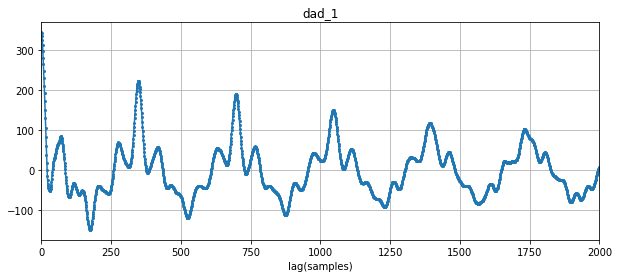

<Figure size 432x288 with 0 Axes>

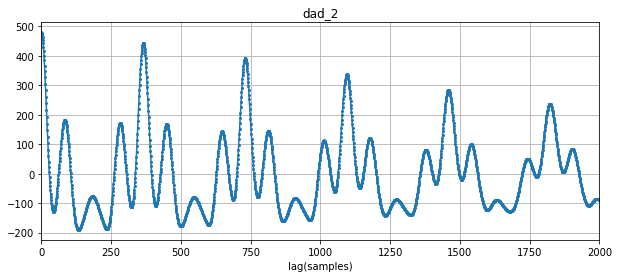

<Figure size 432x288 with 0 Axes>

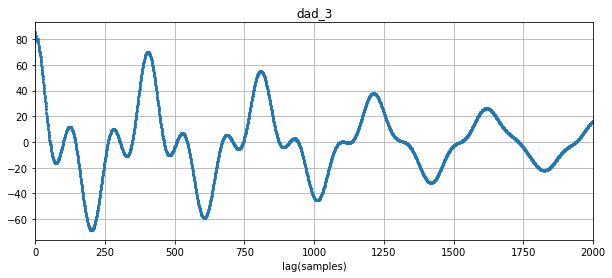

<Figure size 432x288 with 0 Axes>

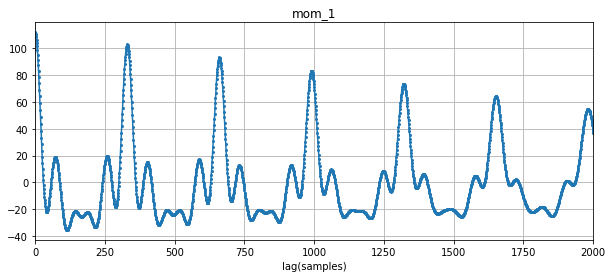

<Figure size 432x288 with 0 Axes>

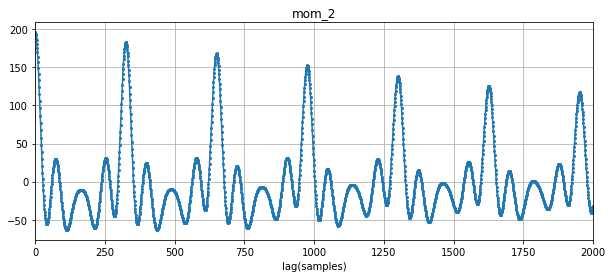

(10000,)


<Figure size 432x288 with 0 Axes>

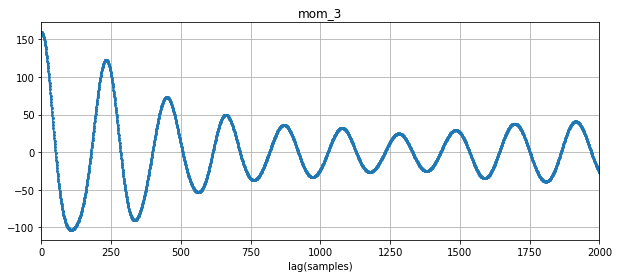

<Figure size 432x288 with 0 Axes>

In [133]:
'''
Before starting to solve the problem,
let's observe the autocorrelate functions of the vowel segments first to determine 
how to pick the peaks.
'''
r_dad_1 = r_dad_1[int(0.3*sr):int(0.35*sr)]
r_dad_1 = librosa.autocorrelate(dad_1, max_size=10000)
plt.figure(figsize=(10,4))
plt.plot(r_dad_1, 'o-', markersize=2)
plt.title('dad_1')
plt.xlabel('lag(samples)')
plt.xlim(0,2000)
plt.grid()
plt.show()
plt.clf()

r_dad_2 = librosa.autocorrelate(dad_2, max_size=10000)
plt.figure(figsize=(10,4))
plt.plot(r_dad_2, 'o-', markersize=2)
plt.title('dad_2')
plt.xlabel('lag(samples)')
plt.xlim(0,2000)
plt.grid()
plt.show()
plt.clf()

r_dad_3 = librosa.autocorrelate(dad_3, max_size=10000)
plt.figure(figsize=(10,4))
plt.plot(r_dad_3, 'o-', markersize=2)
plt.title('dad_3')
plt.xlabel('lag(samples)')
plt.xlim(0,2000)
plt.grid()
plt.show()
plt.clf()

r_mom_1 = librosa.autocorrelate(mom_1, max_size=10000)
plt.figure(figsize=(10,4))
plt.plot(r_mom_1, 'o-', markersize=2)
plt.title('mom_1')
plt.xlabel('lag(samples)')
plt.xlim(0,2000)
plt.grid()
plt.show()
plt.clf()

r_mom_2 = librosa.autocorrelate(mom_2, max_size=10000)
plt.figure(figsize=(10,4))
plt.plot(r_mom_2, 'o-', markersize=2)
plt.title('mom_2')
plt.xlabel('lag(samples)')
plt.xlim(0,2000)
plt.grid()
plt.show()
plt.clf()

r_mom_3 = librosa.autocorrelate(mom_3, max_size=10000)
print(r_mom_3.shape)
plt.figure(figsize=(10,4))
plt.plot(r_mom_3, 'o-', markersize=2)
plt.title('mom_3')
plt.xlabel('lag(samples)')
plt.xlim(0,2000)
plt.grid()
plt.show()
plt.clf()

### $\therefore$ My heuristic approach: selecting the second local maximum point before 500 sample point (for my case) is appropriate for estimating $f_0$

In [136]:
def smooth(sig, window_len=11, window='hanning'):
    s = np.r_[sig[window_len-1:0:-1],sig,sig[-2:-window_len-1:-1]]
    w = eval('np.'+window+'(window_len)')
    smoothed_signal = np.convolve(w/w.sum(),s,mode='valid')
    return smoothed_signal

def second_local_max(sig):
    # smooth the signal to make robust to noise.
    signal_smoothed = smooth(sig)
    maxima_xs = signal.argrelextrema(signal_smoothed,np.greater)[0]
    first_val = -1000000000
    second_val = -10000000000
    first = 0
    second = 0
    # print(maxima_xs)
    for max_point in maxima_xs:
        if max_point > 500: return second
        if signal_smoothed[max_point] > first_val:
            second_val = first_val
            second = first
            first_val = signal_smoothed[max_point]
            first = max_point
        elif signal_smoothed[max_point] > second_val:
            second_val = signal_smoothed[max_point]
            second = max_point
        else:
            continue
            
    return second


In [142]:
# a)
print("Estimated pitch for each segmented vowels.")
print()
print("dad_1('아') : {}".format(sr / second_local_max(r_dad_1)))
print("dad_2('버') : {}".format(sr / second_local_max(r_dad_2)))
print("dad_3('지') : {}".format(sr / second_local_max(r_dad_3)))
print()
print("mom_1('어') : {}".format(sr / second_local_max(r_mom_1)))
print("mom_2('머') : {}".format(sr / second_local_max(r_mom_2)))
print("mom_3('니') : {}".format(sr / second_local_max(r_mom_3)))

Estimated pitch for each segmented vowels.

dad_1('아') : 125.2840909090909
dad_2('버') : 119.1891891891892
dad_3('지') : 107.8239608801956

mom_1('어') : 131.6417910447761
mom_2('머') : 133.63636363636363
mom_3('니') : 186.864406779661


In [187]:
def get_pitch_contour(sig):
    sig = copy.deepcopy(sig)
    # zero_padding
    hop_step = int(len(sig)/hop_length)
    zero_num = hop_step * hop_length + n_fft - len(sig)
    sig = np.concatenate((sig, np.zeros(zero_num)))
    pitches = []
    for i in range(hop_step + 1):
        x = sig[i * hop_step : i * hop_step + n_fft]
        r_x = librosa.autocorrelate(x, max_size=10000)
        pitches.append(sr / second_local_max(r_x))
    return np.array(pitches)


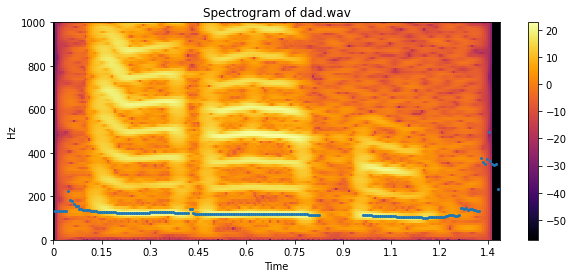

In [209]:
# b) dad
stft = librosa.stft(dad, n_fft=n_fft, hop_length=hop_length)
spect, _ = librosa.magphase(stft)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spect), sr=sr, hop_length=hop_length, cmap='inferno', x_axis = 'time', y_axis='linear')
plt.ylim([0,1000])
plt.title('Spectrogram of dad.wav')
pitches = get_pitch_contour(dad)
ti = np.arange(len(pitches), dtype='float64')
ti *= (hop_length / sr)
plt.plot(ti, pitches, 'o',markersize=2)
plt.colorbar()



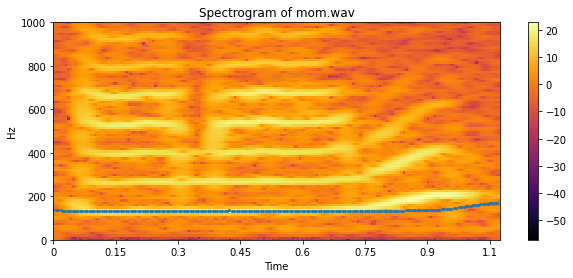

In [210]:
# b) mom
stft = librosa.stft(mom, n_fft=n_fft, hop_length=hop_length)
spect, _ = librosa.magphase(stft)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spect), sr=sr, hop_length=hop_length, cmap='inferno', x_axis = 'time', y_axis='linear')
plt.ylim([0,1000])
plt.title('Spectrogram of mom.wav')
pitches = get_pitch_contour(mom)
ti = np.arange(len(pitches), dtype='float64')
ti *= (hop_length / sr)
plt.plot(ti, pitches, 'o',markersize=2)
plt.colorbar()


### Analyzing the two spectrogram except the noisy part(the starting points and the end points of the 'dad.wav'), we can observe that the pitch of 'mom.wav' is increasing. When I pronounciate the question mark of mom.wav, I pitched up the sound little bit. And the result corresponds to the fact.


---


4.   Formant analysis (30 pts)
 
 Read your vowel segments you saved in Prob 2. In Notebook. For each vowel segment, do the followings:

*   a. Compute a magnitude spectrum.

*   b. Compute a smoothed spectrum (spectral envelope) by lowpass liftering the original cepstrum using a proper window size of your own choice.

*   c. Overlay a smoothed spectrum on the original magnitude spectrum.


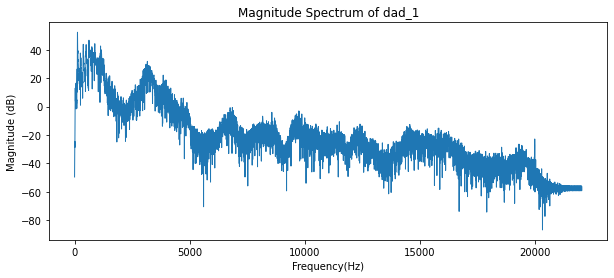

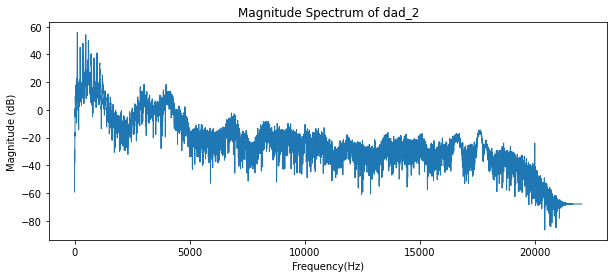

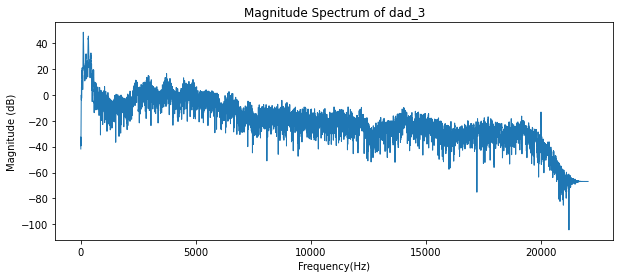

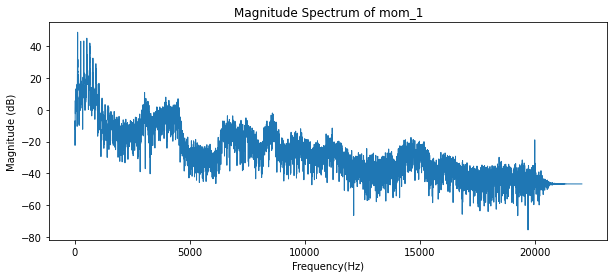

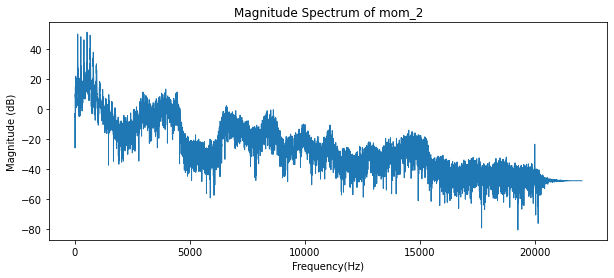

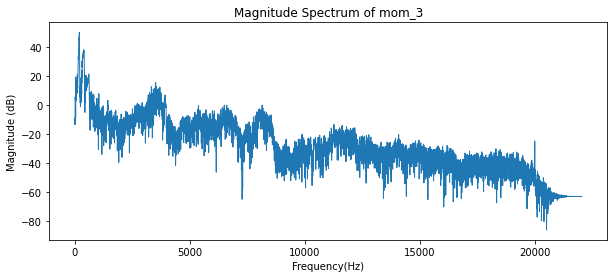

In [230]:
# a) magnitude spectrum
def draw_magnitude_spectrum(sig, name):
    n_fft = len(sig)
    overlap = n_fft * 3 / 4
    winlen = n_fft
    window = np.hamming(winlen)
    x = sig[:n_fft]
    x_windowed = x * window
    X = np.fft.fft(x_windowed, n_fft)
    c_r = np.fft.ifft(np.log(np.abs(X) + np.finfo(float).eps), n_fft).real

    fi = np.arange(0, sr // 2, sr / n_fft)
    plt.figure(figsize=(10,4))
    plt.title('Magnitude Spectrum of '+name)
    plt.xlabel('Frequency(Hz)')
    plt.ylabel('Magnitude (dB)')
    # print(fi.shape)
    # print(X.shape[0] // 2)
    plt.plot(fi[:X.shape[0] // 2], 20 * np.log10(np.abs(X[:len(X) // 2]  + np.finfo(float).eps))
            , linewidth=1)
    
names = ['dad_1', 'dad_2', 'dad_3', 'mom_1', 'mom_2', 'mom_3']
for i, sigs in enumerate([dad_1, dad_2, dad_3, mom_1, mom_2, mom_3]):
    draw_magnitude_spectrum(sigs, names[i])

In [ ]:
# b) smoothed spectrum


In [ ]:
# c) 
